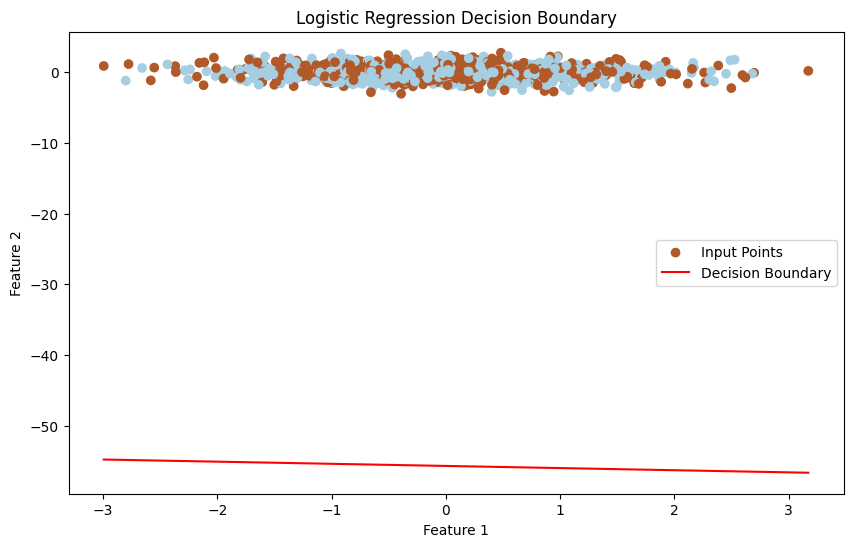

In [5]:
import matplotlib.pyplot as plt

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y, y_pred):
        return np.log(1 + np.exp(y * y_pred))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            loss = np.mean(self.loss(y, predictions))
            
            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, y * (np.exp(y * predictions) / (1 + np.exp(y * predictions))))
            db = (1/num_samples) * np.sum(y * (np.exp(y * predictions) / (1 + np.exp(y * predictions))))
            
            # Update weights and bias using gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        y_pred = [1 if i > 0.5 else 0 for i in predictions]
        return y_pred



    # ... (rest of the class implementation)

# Generate toy data
np.random.seed(0)
num_samples = 1000
num_features = 2
X = np.random.randn(num_samples, num_features)
y = np.random.randint(2, size=num_samples)

# Instantiate and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=10000)
model.fit(X, y)

# Make predictions for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# grid_points = np.c_[xx.ravel(), yy.ravel()]
# predictions = model.predict(grid_points)
# predictions = np.array(predictions).reshape(xx.shape)

# Plot the input points and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', label="Input Points")
# plt.contourf(xx, yy, predictions, alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
w1, w2 = model.weights
b = model.bias
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_line = (-w1 * x_line - b) / w2

plt.plot(x_line, y_line, '-r', label='Decision Boundary')
plt.legend()
plt.show()


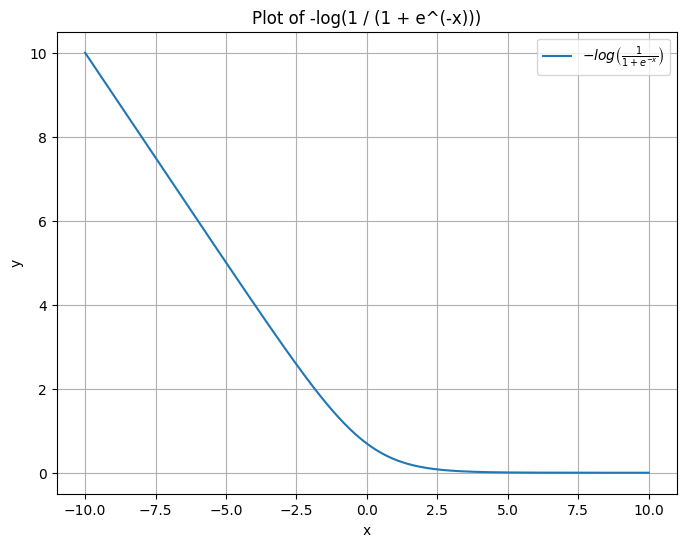

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
y = -np.log(1 / (1 + np.exp(-x)))

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$-log\left(\frac{1}{1+e^{-x}}\right)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of -log(1 / (1 + e^(-x)))')
plt.legend()
plt.grid(True)
plt.show()
